## Saluran dan Transmisi

### Percobaan 1 Propagasi ruang bebas

In [3]:
import pandas as pd

# Nama file Excel
p8_raw = 'p8_data_raw.xlsx'

# Baca file Excel ke dalam DataFrame
df_1 = pd.read_excel(p8_raw, sheet_name='Sheet1')
df_1.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
0,20,75.0,
1,25,68.0,
2,30,62.5,
3,35,54.0,
4,40,45.0,


In [6]:
df_1.dtypes

Jarak antar-Mast (cm)       int64
Arus Penerima (µA)        float64
Daya Penerima (dBm)        object
dtype: object

In [16]:
import numpy as np

def hitung_daya(arus):
  hasil = (20 * np.log10(arus*0.000001)) + (10 * np.log10(50)) + 30
  return hasil

arus_1 = df_1['Arus Penerima (µA)  ']
df_1['Daya Penerima (dBm) '] = hitung_daya(arus_1)
print(df_1.head())

   Jarak antar-Mast (cm)   Arus Penerima (µA)    Daya Penerima (dBm) 
0                      20                  75.0            -35.509075
1                      25                  68.0            -36.360122
2                      30                  62.5            -37.092700
3                      35                  54.0            -38.362425
4                      40                  45.0            -39.946050


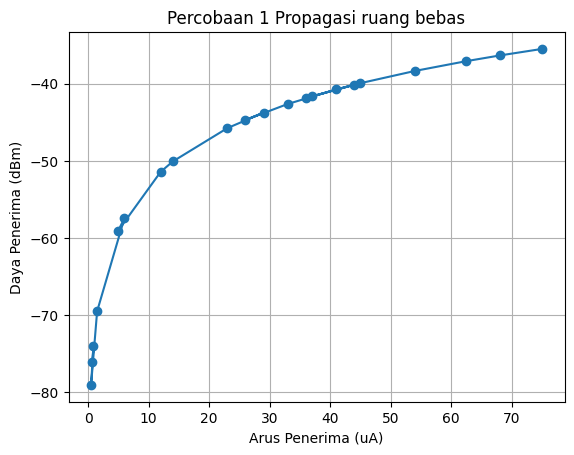

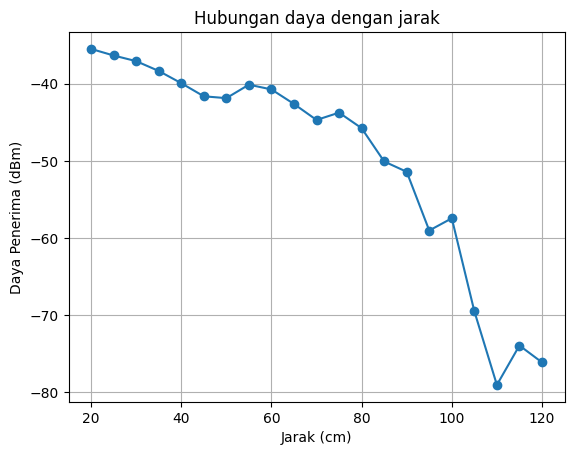

In [32]:
import matplotlib.pyplot as plt
# Plot garis
def plot_garis(judul, arus, daya):
  plt.plot(arus, daya, marker='o', linestyle='-')

  # Menambahkan label dan judul
  plt.xlabel('Arus Penerima (uA)')
  plt.ylabel('Daya Penerima (dBm)')
  plt.title(judul)

  # Menampilkan plot
  plt.grid(True)
  plt.show()

def plot_garis_jarak(judul, jarak, daya):
  plt.plot(jarak, daya, marker='o', linestyle='-')

  # Menambahkan label dan judul
  plt.xlabel('Jarak (cm)')
  plt.ylabel('Daya Penerima (dBm)')
  plt.title(judul)

  # Menampilkan plot
  plt.grid(True)
  plt.show()

def plot_garis_jarak(judul, jarak, daya):
  plt.plot(jarak, daya, marker='o', linestyle='-')

  # Menambahkan label dan judul
  plt.xlabel('Jarak (cm)')
  plt.ylabel('Daya Penerima (dBm)')
  plt.title(judul)

  # Menampilkan plot
  plt.grid(True)
  plt.show()

plot_garis('Percobaan 1 Propagasi ruang bebas', df_1['Arus Penerima (µA)  '], df_1['Daya Penerima (dBm) '])
plot_garis_jarak('Hubungan daya dengan jarak', df_1['Jarak antar-Mast (cm) '], df_1['Daya Penerima (dBm) '])

<strong>Menghitung redaman propagasi</strong> <br>

In [125]:
import math
import numpy as np

def loss_jarak(PRx):
  PTx = (20 * np.log10(100*0.000001)) + (10 * np.log10(50)) + 30
  return (PTx - PRx)

def loss_jarak_teoritis(jarak):
  jarak = jarak * 0.01
  lamda = 340/750000000
  L = 10 * np.log10((4 * np.pi * jarak)**2 / lamda)
  hasil = L + 30
  return hasil

df_1['redaman (dBm)'] = loss_jarak(df_1['Daya Penerima (dBm) '])
df_1['redaman propagasi ruang bebas (dBm)'] = loss_jarak_teoritis(df_1['Jarak antar-Mast (cm) '])

df_1.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm),redaman (dBm),redaman propagasi ruang bebas (dBm)
0,20,75.0,-35.509075,2.498775,101.440621
1,25,68.0,-36.360122,3.349822,103.378821
2,30,62.5,-37.092700,4.082400,104.962446
3,35,54.0,-38.362425,5.352125,106.301382
4,40,45.0,-39.946050,6.935750,107.461221


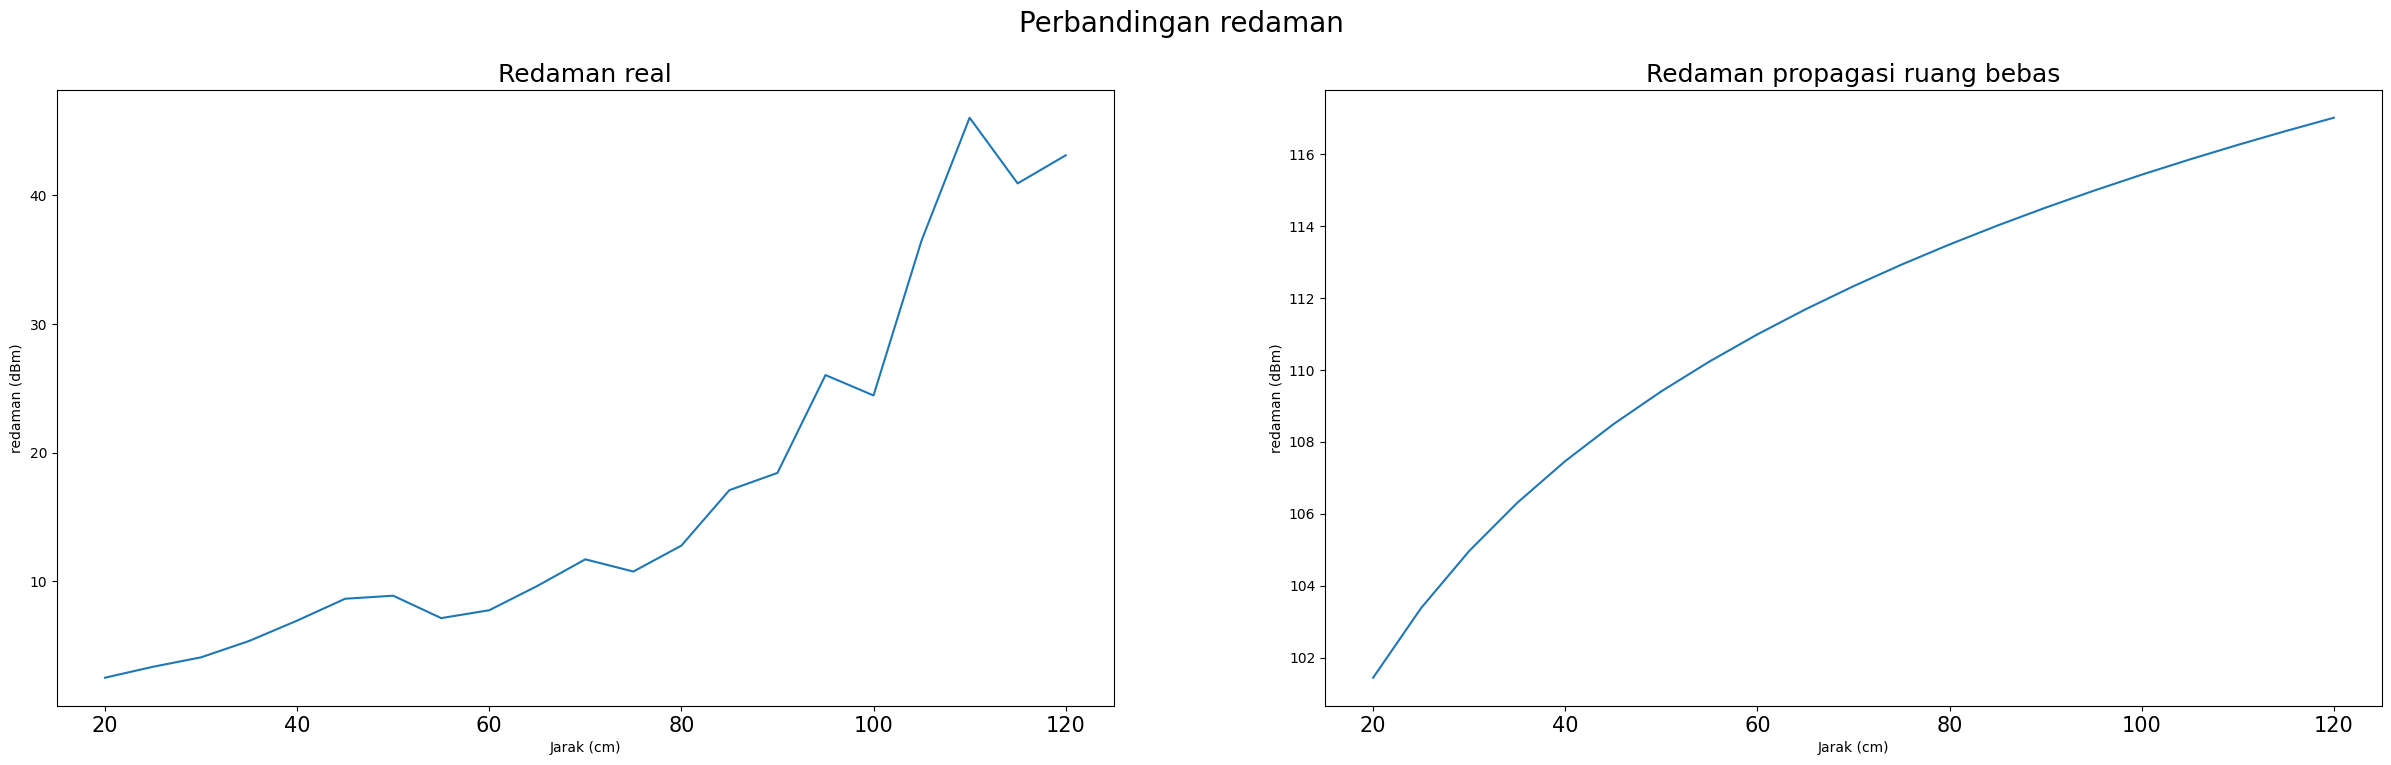

In [129]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.lineplot(y="redaman (dBm)", x="Jarak antar-Mast (cm) ", data=df_1, ax=ax[0])
ax[0].set_ylabel('redaman (dBm)')
ax[0].set_xlabel('Jarak (cm)')
ax[0].set_title("Redaman real", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.lineplot(y="redaman propagasi ruang bebas (dBm)", x="Jarak antar-Mast (cm) ", data=df_1, ax=ax[1])
ax[1].set_ylabel('redaman (dBm)')
ax[1].set_xlabel('Jarak (cm)')
ax[1].set_title("Redaman propagasi ruang bebas", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
 
plt.suptitle("Perbandingan redaman", fontsize=20)
plt.show()

### Percobaan 2 Progasi dengan adanya permukaan yang memantulkan

### Ketinggian sama

In [20]:
# Keadaan normal
df_21 = pd.read_excel(p8_raw, sheet_name='Sheet2')
df_21.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
0,20,75,NaN
1,25,68,NaN
2,30,64,NaN
3,35,60,NaN
4,40,56,NaN


In [21]:
df_21['Daya Penerima (dBm)'] = hitung_daya(df_21['Arus Penerima (µA)'])
df_21.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
0,20,75,-35.509075
1,25,68,-36.360122
2,30,64,-36.886700
3,35,60,-37.447275
4,40,56,-38.046539


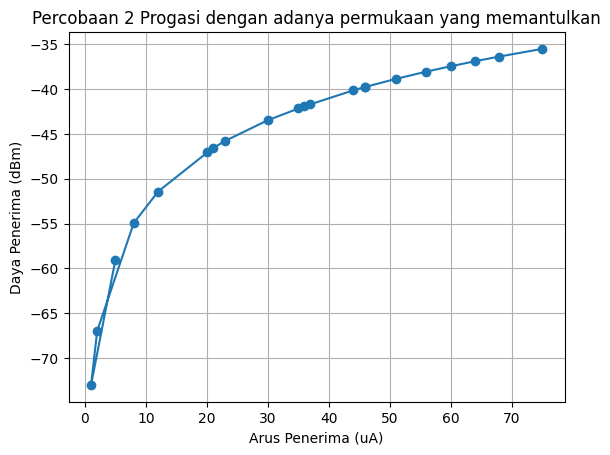

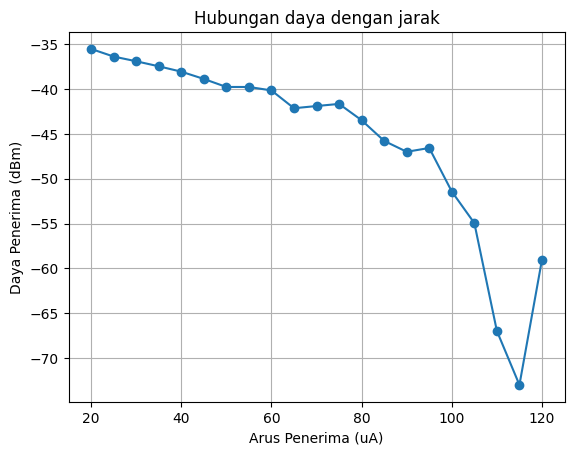

In [31]:
plot_garis('Percobaan 2 Progasi dengan adanya permukaan yang memantulkan', df_21['Arus Penerima (µA)'], df_21['Daya Penerima (dBm)'])
plot_garis_jarak('Hubungan daya dengan jarak', df_21['Jarak antar-Mast (cm)'], df_21['Daya Penerima (dBm)'])

### Transmitter diatas fiber optic kit
Tinggi Transmitter = 65 cm <br>
Tinggi Receiver = 45

In [24]:
Tx = 65
Rx = 45

df_22 = pd.read_excel(p8_raw, sheet_name='Sheet3')
df_22.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
0,20,75.0,NaN
1,25,73.0,NaN
2,30,64.0,NaN
3,35,58.0,NaN
4,40,50.0,NaN


In [27]:
df_22['Daya Penerima (dBm)'] = hitung_daya(df_22['Arus Penerima (µA)'])
df_22.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
0,20,75.0,-35.509075
1,25,73.0,-35.743843
2,30,64.0,-36.886700
3,35,58.0,-37.741740
4,40,50.0,-39.030900


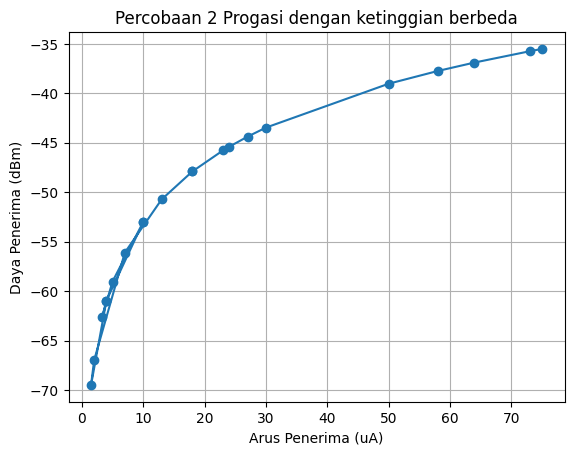

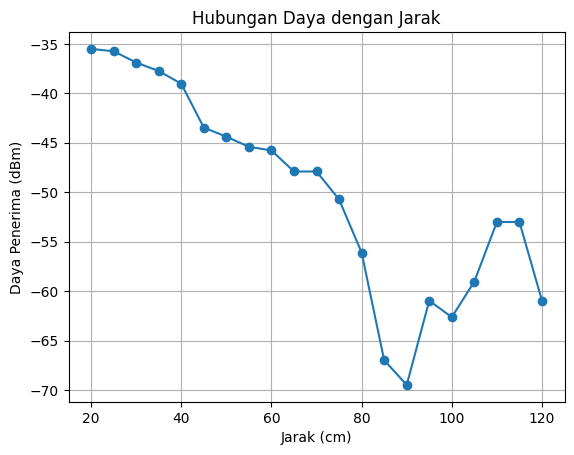

In [33]:
plot_garis('Percobaan 2 Progasi dengan ketinggian berbeda', df_22['Arus Penerima (µA)'], df_22['Daya Penerima (dBm)'])
plot_garis_jarak('Hubungan Daya dengan Jarak', df_22['Jarak antar-Mast (cm)'], df_22['Daya Penerima (dBm)'])

<strong>Menghitung redaman propagasi</strong> <br>

In [71]:
import math
import numpy as np

def loss_jarak(PRx):
  PTx = (20 * np.log10(100*0.000001)) + (10 * np.log10(50)) + 30
  return (PTx - PRx)

def loss_pantulan(jarak):
  Htx = 0.65
  Hrx = 0.45
  lamda = 340/750000000
  jarak = jarak * 0.01
  pembilang = 10 * np.log10(0.25) * ((4 * math.pi * jarak) ** 2)
  penyebut = np.sin((2 * math.pi * Htx * Hrx)**2 / (lamda * jarak))
  hasil = ( pembilang / penyebut ) + 30
  return hasil
  
  
PRx = df_21['Daya Penerima (dBm)']
redaman = loss_jarak(PRx)
print(redaman[:5])



0    2.498775
1    3.349822
2    3.876401
3    4.436975
4    5.036239
Name: Daya Penerima (dBm), dtype: float64


In [54]:
df_21['redaman (dBm)'] = redaman
df_21.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm),redaman (dBm)
0,20,75,-35.509075,2.498775
1,25,68,-36.360122,3.349822
2,30,64,-36.886700,3.876401
3,35,60,-37.447275,4.436975
4,40,56,-38.046539,5.036239


<strong>Percobaan dengan ketinggian antena berbeda</strong>

In [72]:
redaman_jarak = loss_jarak(df_22['Daya Penerima (dBm)'])
redaman_pantulan = loss_pantulan(df_22['Jarak antar-Mast (cm)'])
df_22['redaman (dBm)'] = redaman_jarak
df_22['redaman pantulan (dBm)'] = redaman_pantulan
df_22.head()

,Jarak antar-Mast (cm),Arus Penerima (µA),Daya Penerima (dBm),redaman (dBm),redaman pantulan (dBm)
0,20,75.0,-35.509075,2.498775,-8.109782
1,25,73.0,-35.743843,2.733543,-79.035789
2,30,64.0,-36.886700,3.876401,2006.421289
3,35,58.0,-37.741740,4.731440,279.378385
4,40,50.0,-39.030900,6.020600,-178.466866


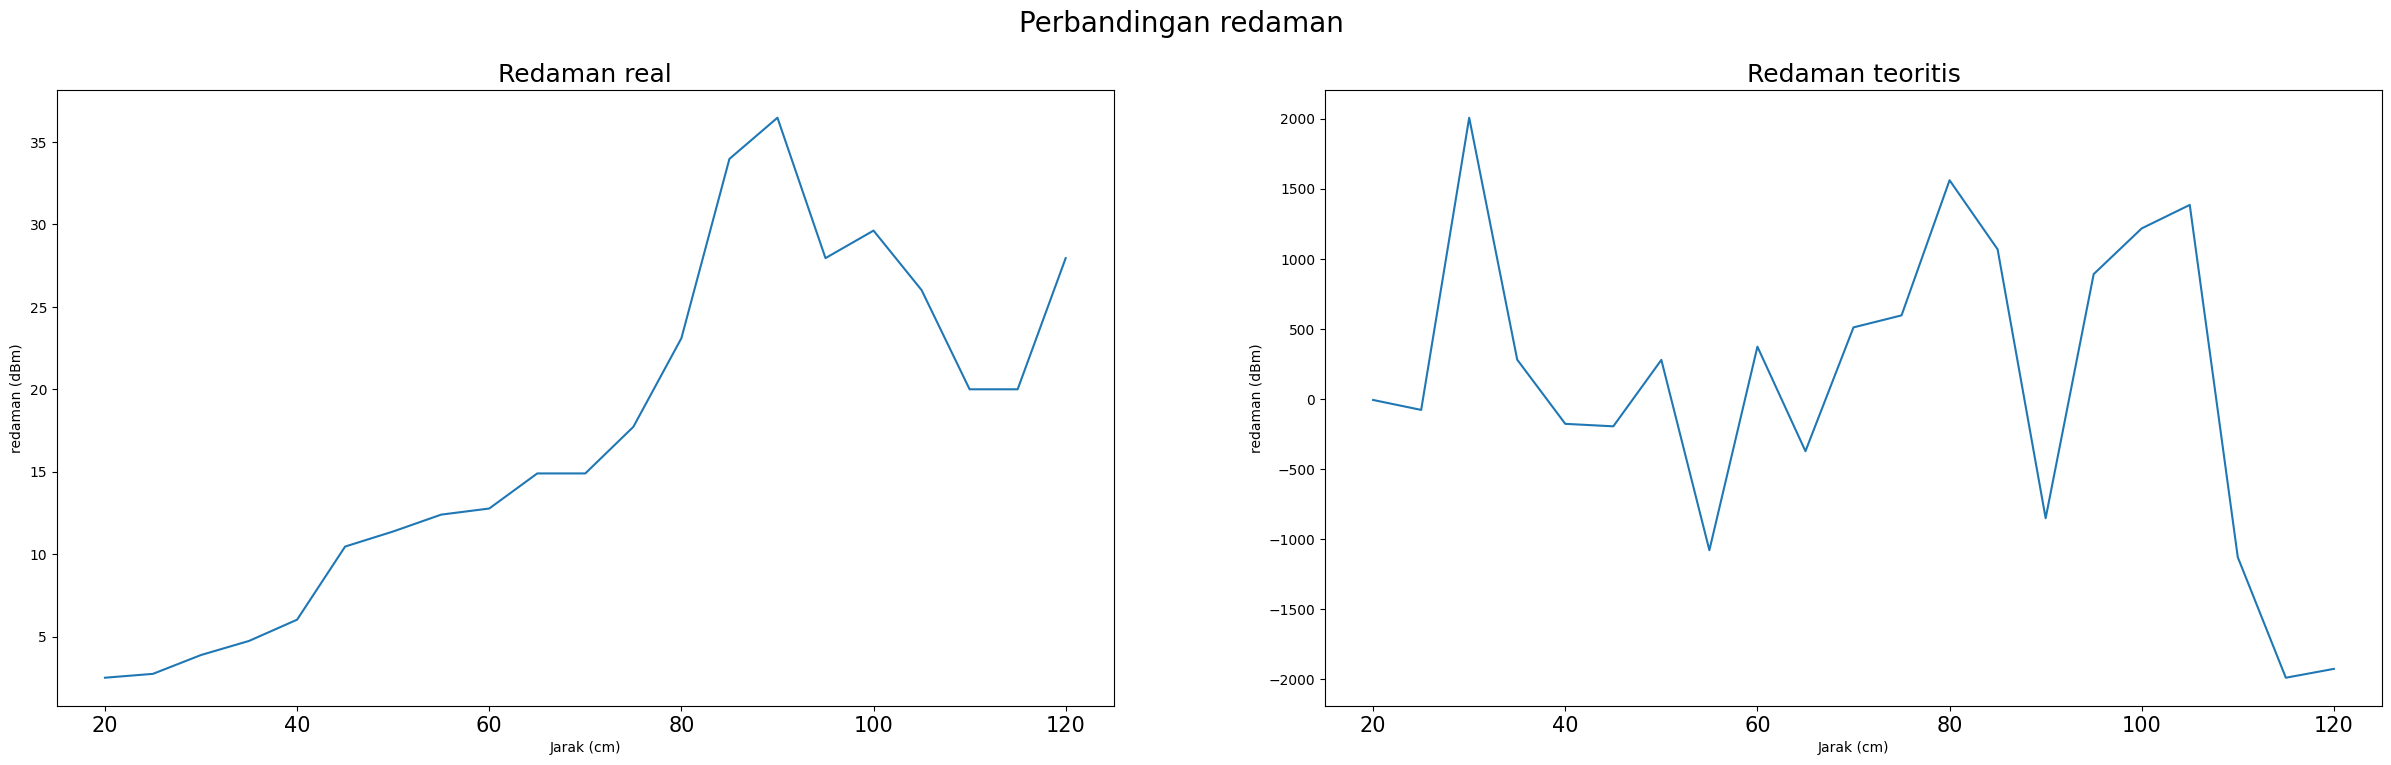

In [73]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.lineplot(y="redaman (dBm)", x="Jarak antar-Mast (cm)", data=df_22, ax=ax[0])
ax[0].set_ylabel('redaman (dBm)')
ax[0].set_xlabel('Jarak (cm)')
ax[0].set_title("Redaman real", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.lineplot(y="redaman pantulan (dBm)", x="Jarak antar-Mast (cm)", data=df_22, ax=ax[1])
ax[1].set_ylabel('redaman (dBm)')
ax[1].set_xlabel('Jarak (cm)')
ax[1].set_title("Redaman teoritis", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
 
plt.suptitle("Perbandingan redaman", fontsize=20)
plt.show()

### Percobaan 3 Propagasi dengan adanya penghalang


In [66]:
# Nama file Excel
p8_raw = 'p8_data_raw.xlsx'

df_3 = pd.read_excel(p8_raw, sheet_name='Sheet4')
df_3 = df_3.drop(0)
df_3.head()

,Jarak Penghalang Terhadap Transmitting Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
1,10.0,5.5,
2,15.0,8.0,
3,20.0,6.0,
4,25.0,25.0,
5,30.0,40.0,


In [67]:
df_3['Daya Penerima (dBm) '] = hitung_daya(df_3['Arus Penerima (µA)  '])
df_3.head()

,Jarak Penghalang Terhadap Transmitting Mast (cm),Arus Penerima (µA),Daya Penerima (dBm)
1,10.0,5.5,-58.203046
2,15.0,8.0,-54.948500
3,20.0,6.0,-57.447275
4,25.0,25.0,-45.051500
5,30.0,40.0,-40.969100


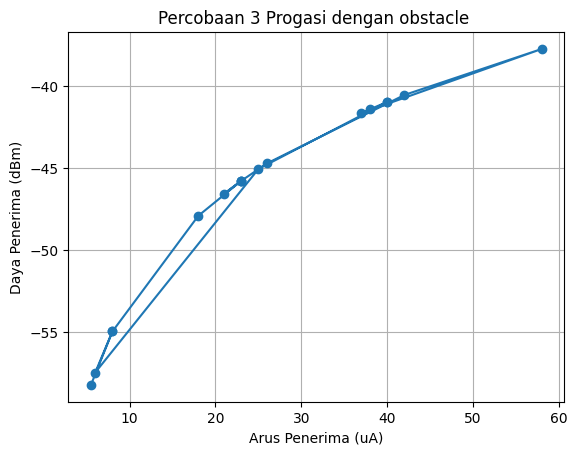

In [132]:
plot_garis('Percobaan 3 Progasi dengan obstacle ', df_3['Arus Penerima (µA)  '], df_3['Daya Penerima (dBm) '])

In [68]:
#hitung redaman

df_3['redaman (dBm)'] = loss_jarak(df_3['Daya Penerima (dBm) '])
df_3.head()

,Jarak Penghalang Terhadap Transmitting Mast (cm),Arus Penerima (µA),Daya Penerima (dBm),redaman (dBm)
1,10.0,5.5,-58.203046,25.192746
2,15.0,8.0,-54.948500,21.938200
3,20.0,6.0,-57.447275,24.436975
4,25.0,25.0,-45.051500,12.041200
5,30.0,40.0,-40.969100,7.958800


<strong> mencari parameter h, v dan redaman (L(v)) </strong>

In [109]:
import math
import numpy as np

lamda = 340 / 750000000 

def cari_h(jarak):
  jarak = jarak * 0.01
  pembilang = lamda * jarak * abs(1 - jarak)
  penyebut = jarak + abs(1 - jarak)
  hasil = (pembilang/penyebut) ** 0.5
  return hasil

def cari_v(jarak, h):
  jarak = jarak * 0.01
  pembilang = 2 * (jarak + abs( 1 - jarak))
  penyebut = lamda * jarak * abs(1 - jarak)
  hasil = (pembilang/penyebut) ** 0.5
  hasil = np.round(hasil, decimals=6)
  result = hasil * np.round(h, decimals=6)
  return result

def loss_obstacle(v) :
  if v > -0.8 and v < 0:
    hasil = -20 * np.log10(0.5 - 0.26 * v)
    return hasil
  elif v > 0 and v < 1:
    hasil = -20 * np.log10(0.5 * np.exp(-0.95 * v))
    return hasil
  elif v > 1 and v < 2.4:
    hasil = -20 * np.log10(0.4 - (0.1184 - (0.38 - 0.1 * v)**2 ) ** 0.5)
    return hasil
  elif v > 2.4:
    hasil = -20 * np.log10(0.225/v)
    return hasil
  else:
    hasil = 1
    return hasil

df_3['h'] = cari_h(df_3['Jarak Penghalang Terhadap Transmitting Mast (cm) '])
df_3['v'] = cari_v(df_3['Jarak Penghalang Terhadap Transmitting Mast (cm) '], df_3['h'])

df_3['redaman obstacle (dBm)'] = df_3['v'].apply(loss_obstacle)

df_3.head(20)

,Jarak Penghalang Terhadap Transmitting Mast (cm),Arus Penerima (µA),Daya Penerima (dBm),redaman (dBm),h,v,redaman obstacle (dBm)
1,10.0,5.5,-58.203046,25.192746,0.000202,1.414283,16.360771
2,15.0,8.0,-54.948500,21.938200,0.000240,1.411765,16.346927
3,20.0,6.0,-57.447275,24.436975,0.000269,1.412533,16.351149
4,25.0,25.0,-45.051500,12.041200,0.000292,1.416408,16.372450
5,30.0,40.0,-40.969100,7.958800,0.000309,1.416299,16.371852
6,35.0,40.0,-40.969100,7.958800,0.000321,1.413580,16.356909
7,40.0,38.0,-41.414628,8.404328,0.000330,1.414863,16.363961
8,45.0,37.0,-41.646265,8.635966,0.000335,1.414371,16.361256
9,50.0,58.0,-37.741740,4.731440,0.000337,1.415683,16.368467
10,55.0,42.0,-40.545314,7.535014,0.000335,1.414371,16.361256


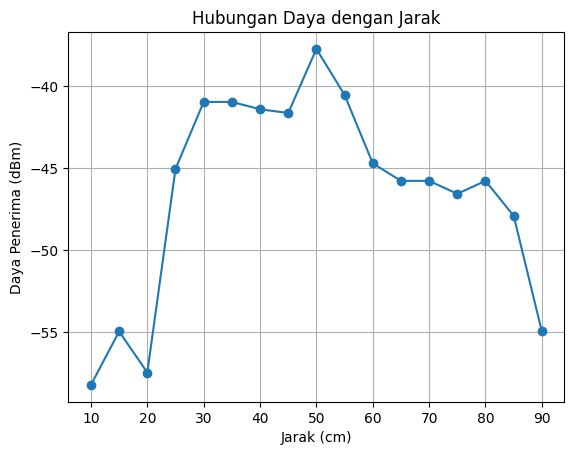

In [137]:
plot_garis_jarak('Hubungan Daya dengan Jarak', df_3['Jarak Penghalang Terhadap Transmitting Mast (cm) '], df_3['Daya Penerima (dBm) '])

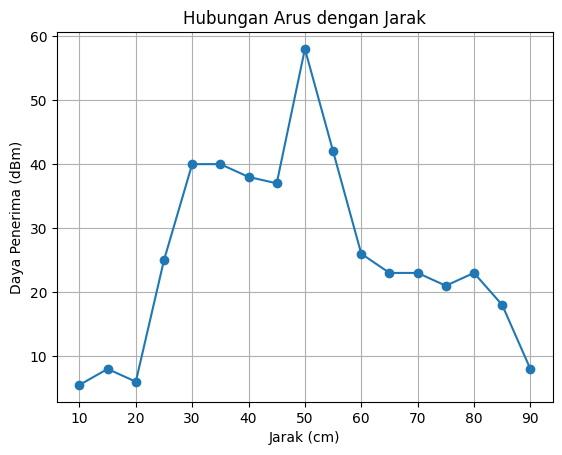

In [138]:
plt.plot(df_3['Jarak Penghalang Terhadap Transmitting Mast (cm) '], df_3['Arus Penerima (µA)  '], marker='o', linestyle='-')

# Menambahkan label dan judul
plt.xlabel('Jarak (cm)')
plt.ylabel('Arus Penerima (uA)')
plt.title('Hubungan Arus dengan Jarak')

# Menampilkan plot
plt.grid(True)
plt.show()

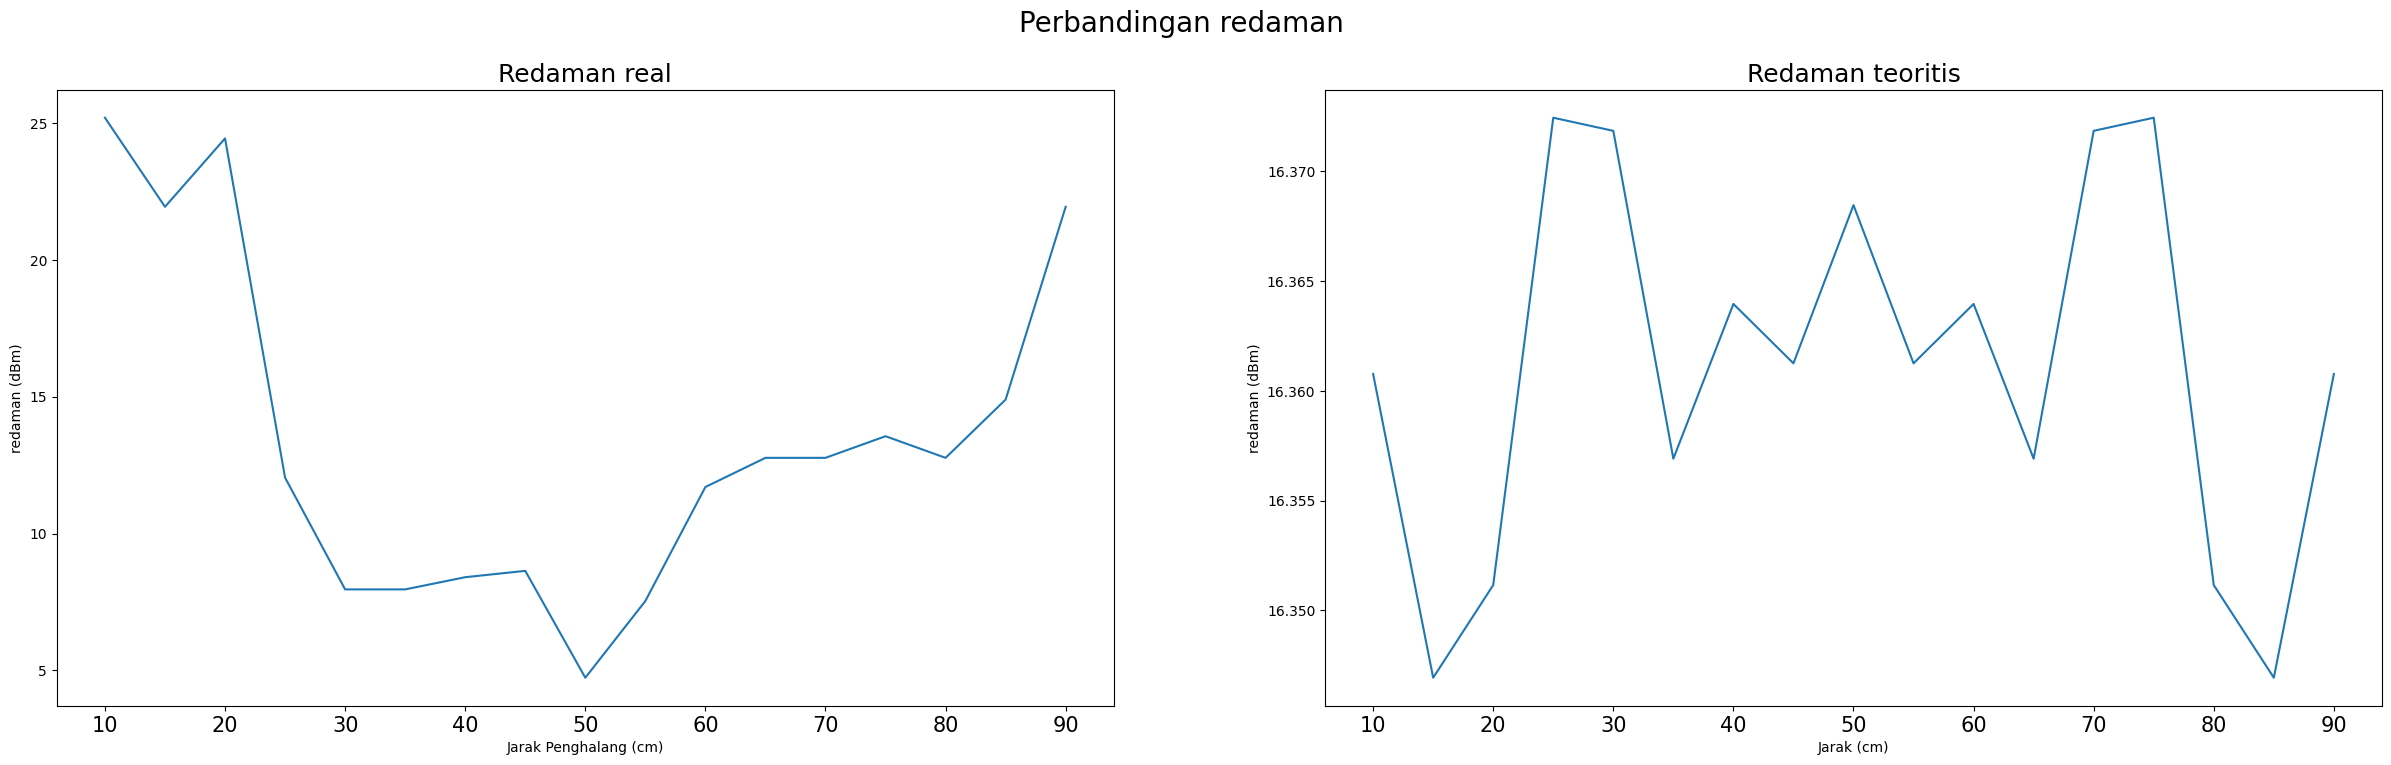

In [110]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.lineplot(y="redaman (dBm)", x="Jarak Penghalang Terhadap Transmitting Mast (cm) ", data=df_3, ax=ax[0])
ax[0].set_ylabel('redaman (dBm)')
ax[0].set_xlabel('Jarak Penghalang (cm)')
ax[0].set_title("Redaman real", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.lineplot(y="redaman obstacle (dBm)", x="Jarak Penghalang Terhadap Transmitting Mast (cm) ", data=df_3, ax=ax[1])
ax[1].set_ylabel('redaman (dBm)')
ax[1].set_xlabel('Jarak (cm)')
ax[1].set_title("Redaman teoritis", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
 
plt.suptitle("Perbandingan redaman", fontsize=20)
plt.show()

Simpan Data

In [130]:
# Membuat ExcelWriter
with pd.ExcelWriter('p8_analisis.xlsx') as writer:
  df_1.to_excel(writer, sheet_name='p_1', index=False)
  df_21.to_excel(writer, sheet_name='p_21', index=False)
  df_22.to_excel(writer, sheet_name='p_22', index=False)
  df_3.to_excel(writer, sheet_name='p_3', index=False)

# Menulis setiap DataFrame ke sheet yang berbeda

### Analisis data

In [135]:
print("rata Daya penerima p1 : ", df_1['Daya Penerima (dBm) '].mean())
print("rata Daya penerima p21 : ", df_21['Daya Penerima (dBm)'].mean())
print("rata Daya penerima p22 : ", df_22['Daya Penerima (dBm)'].mean())
print("rata Daya penerima p3 : ", df_3['Daya Penerima (dBm) '].mean())
print("\n")
print("redaman p1 : ", df_1['redaman (dBm)'].mean())
print("redaman p21 : ", df_21['redaman (dBm)'].mean())
print("redaman p22 : ", df_22['redaman (dBm)'].mean())
print("redaman p3 : ", df_3['redaman (dBm)'].mean())

rata Daya penerima p1 :  -49.76816405555734
rata Daya penerima p21 :  -45.5535667882796
rata Daya penerima p22 :  -50.12868302700166
rata Daya penerima p3 :  -46.493752702880755


redaman p1 :  16.75786409891753
redaman p21 :  12.543266831639786
redaman p22 :  17.118383070361862
redaman p3 :  13.483452746240937


In [112]:
print("Daya penerima p1")
df_1['Daya Penerima (dBm) '].describe()

Daya penerima p1


count    21.000000
mean    -49.768164
std      13.912164
min     -79.030900
25%     -57.447275
50%     -43.762340
75%     -40.141246
max     -35.509075
Name: Daya Penerima (dBm) , dtype: float64

In [133]:
df_1['redaman propagasi ruang bebas (dBm)'].describe()

count     21.000000
mean     111.318044
std        4.557380
min      101.440621
25%      108.484271
50%      112.321982
75%      114.974493
max      117.003646
Name: redaman propagasi ruang bebas (dBm), dtype: float64

In [117]:
print("Daya penerima p2 diatas antena kit")
df_21['Daya Penerima (dBm)'].describe()


Daya penerima p2 diatas antena kit


count    21.000000
mean    -45.553567
std      10.221719
min     -73.010300
25%     -46.989700
50%     -41.884250
75%     -38.858896
max     -35.509075
Name: Daya Penerima (dBm), dtype: float64

In [116]:
print("Daya penerima p2 diatas fiber optic kit")
df_22['Daya Penerima (dBm)'].describe()

Daya penerima p2 dg pantulan


count    21.000000
mean    -50.128683
std      10.449305
min     -69.488475
25%     -59.030900
50%     -47.904850
75%     -43.467875
max     -35.509075
Name: Daya Penerima (dBm), dtype: float64

In [118]:
print("Daya penerima p3")
df_3['Daya Penerima (dBm) '].describe()

Daya penerima p3


count    17.000000
mean    -46.493753
std       6.280802
min     -58.203046
25%     -47.904850
50%     -45.775743
75%     -41.414628
max     -37.741740
Name: Daya Penerima (dBm) , dtype: float64